In [2]:
import pandas as pd
import numpy as np
from summarytools import dfSummary
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("wine_quality_classification.csv")
data.head()

,fixed_acidity,residual_sugar,alcohol,density,quality_label
0,9.3,6.4,13.6,1.0005,high
1,11.2,2.0,14.0,0.9912,medium
2,11.6,0.9,8.2,0.9935,low
3,12.9,6.6,12.7,1.0002,low
4,13.9,13.8,10.4,0.9942,medium


## 2. Data Quality Checks

In [4]:
dfSummary(data, is_collapsible=False)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,fixed_acidity[float64],Mean (sd) : 10.2 (3.5)min < med < max:4.0 < 10.4 < 16.0IQR (CV) : 6.0 (2.9),121 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACgElEQVR4nO3dPY7aUBSG4XvDgAxIttBI0LGBSCkoWUQWmyWkYAXsgA4JISM8Y2GMUyVSioB/uOF88D69mVu8g8890mh8VVUOsO7Low8A1PH26APgb977oXNu0OEjTlVVfd7rPFYQqiHe++H7+/v3OI4nbT/jcDjsvfc/ni1WQrVlEMfxZLlcfiZJkjd9OE3TaLVaTXa73cA5R6gIK0mSfDqdfrR8fHjXwxjBZQoS+EbFH5YvcoQK55z9ixyh4jfTFzlCDaDDKzS+XC79e5+nCasXOUK9sy6v0KIoorIsv+Z5/tM51zaWhynLsu+ci733bR6/Ot8S6v21foVuNpvJer0enc/nXqjDhZJlWb8oim/z+bzX6/Uajw635ltCDaTNK3S/38vuQE+n01sURaPFYpHPZrN9k2frzLeE+g/Kc+YjjcfjtjPu1V/SoKFa3std88pzplXBQrW+l7vhJedMy0J+o5rey9XxanOmZcFnVKt7OWgxfZkKuZeDFrOhht7LQYvZUEPv5aDlZqiP3ie23cuVZRm79mPDS+9CLboaquo+sevYwC7UnlvfqJL7xC5jg3PsQi2qNaOq7hPbjg0Wzt5Wh02J6XHH7GUKzXUZeayPO4T6RLqMPNbHHUJ9Qm1GHuvjDn8uDQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgm1/iFamqZR0w8+Ho+Rc85lWRZtt9vR/3xe9Wernrvr83X6+gXdMrLf3JwiugAAAABJRU5ErkJggg=="">",0(0.0%)
2,residual_sugar[float64],Mean (sd) : 7.7 (4.2)min < med < max:0.5 < 7.5 < 15.0IQR (CV) : 7.4 (1.8),145 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACjElEQVR4nO3dTY7aQBRF4VehQQYkW4gIZmwgUgYMWUQWmyUEiRWwA2ZICBnhtMVvRpl1Guyi4rpwvnk1Hpxnm9cttbterwbE7kvTFwDc463pC4iVc65rZp2axw/X6/X9kdfz6gj1A8657nA4/JGm6aDO+d1ut3XO/VSL1XM4zQIOaNShNnhX66RpOpjNZu9ZlpVVDuZ5niwWi8Fms+mYmUyovsNpFnZAow01hrtalmXlaDT6XeNot+5nNqj2cJqFH9BoQ7UXvKvFwGM4zQIOaMyhmtnL3dXwD6ynIIFQIYFQIeHmOyqLb8Tg01BjWBEpOp/PbTNLnXN1jjPcH7h1R2VFVFFRFO3j8fh9Mpm0Wq1W5X2k8nCHHNC71lOsiO53OBzekiTpTafTcjweb6ucVR7u0AMa/R5VVb/ff6nhDj2ghIqHCjWgrKcggVAhgVAhgVAhIeiXKc+9Wnq5XNoPviSIChaq717teDwm5/P5W1mWv8ys7t9H4kkEC9Vnr2ZmtlqtBsvlsnc6nVohri9Wnk8hsyf9FWzwPWrdvdp2u/VafCu+dvg+hcy0fwX7madc+Ku+dvg+hfI8T+bz+Wiz2Xx1zu0qHo/6O8FThqr+2lH3KeQzoLF/J3jKUP9q6rWjKT4D2vRw3vLUob6qOgMa+3Cy8IcEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEu/4hWp7nSdUfvN/vEzOzoiiS9Xrd+5/nVT9b9bp9z9/T1x+nO8ODKf5h4AAAAABJRU5ErkJggg=="">",0(0.0%)
3,alcohol[float64],Mean (sd) : 11.0 (1.8)min < med < max:8.0 < 11.0 < 14.0IQR (CV) : 3.1 (6.3),61 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACvElEQVR4nO3du47aQBSA4TNhQQNItrgIOl5gpRRINDxAyjxsHiFIFFvzBnRICIFw1sIYp0ya5eLxYB/zf+1q1l7rlzVzXKzJskyAqvtW9g0A93gr+wZQH8aYtoi0ci4/ZVn2+dUPCRWFMMa0B4PBzyAIennWHw6HnTHm11exEiqK0gqCoDefzz/DMIwfWbjf7+1yuextt9uWiBAq/AvDMB6NRn9yLG1f+yGHKahAqFCBUKFCbfeojqMSkRvjkjpyfGbB5XJpFnk//6tlqK6jEpHb45K6cX1mSZLYNE3f4zj+LSJ5DlNX1TJUcRiViNw3Lqkhp2e2Xq97q9Wqcz6fGz5urq6hiojTqETkxrikrvI+s91u5/V5cZiCCjffqD6/33q8tvPGPk3TpogExpg8y1/uIObb1VB9f7/1dW3XjX0URc0kSb5PJpNGo9F4eL/2agexZ7j1RvX6/dbXtV039qfT6c1a25lOp/F4PN49svZFD2Le3XWY8vX91te1i9rYd7vdXH93mqaBsG0oVK1P/WUoe9tQ5r7eJ0ItmOu2YbFYjLbb7dAYc8hxedvv93+EYdh9dKHvgb0rQvUkz7bB9W2cJIkVkffZbPYxHA4fCt33wN4VoVaIy9tY5F9s1tqkrH29L4RaQXkPcVWPzQVfpqACoUIFQoUKXveojt/LKz3Xw3N5C7WIUUuV53p4Lm+hFjVqqepcD8/lfTzFqAVF4DAFFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFu/7P1H6/t4/+4uPxaEVEoiiym82m88z1Wq+t9b5d19/T11/LXqGUie0GBwAAAABJRU5ErkJggg=="">",0(0.0%)
4,density[float64],Mean (sd) : 1.0 (0.0)min < med < max:1.0 < 1.0 < 1.0IQR (CV) : 0.0 (232.0),151 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAA

## 3. Exploring the data

In [5]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['fixed_acidity', 'residual_sugar', 'alcohol', 'density']

We have 1 categorical features : ['quality_label']


In [6]:
# proportion of count data on categorical columns
print(data['quality_label'].value_counts(normalize=True) * 100)

medium    35.5
high      34.3
low       30.2
Name: quality_label, dtype: float64


#### Insights
- Our quality label is faily balanced in the dataset

### Univariate Analysis

##### 1. Numerical Features

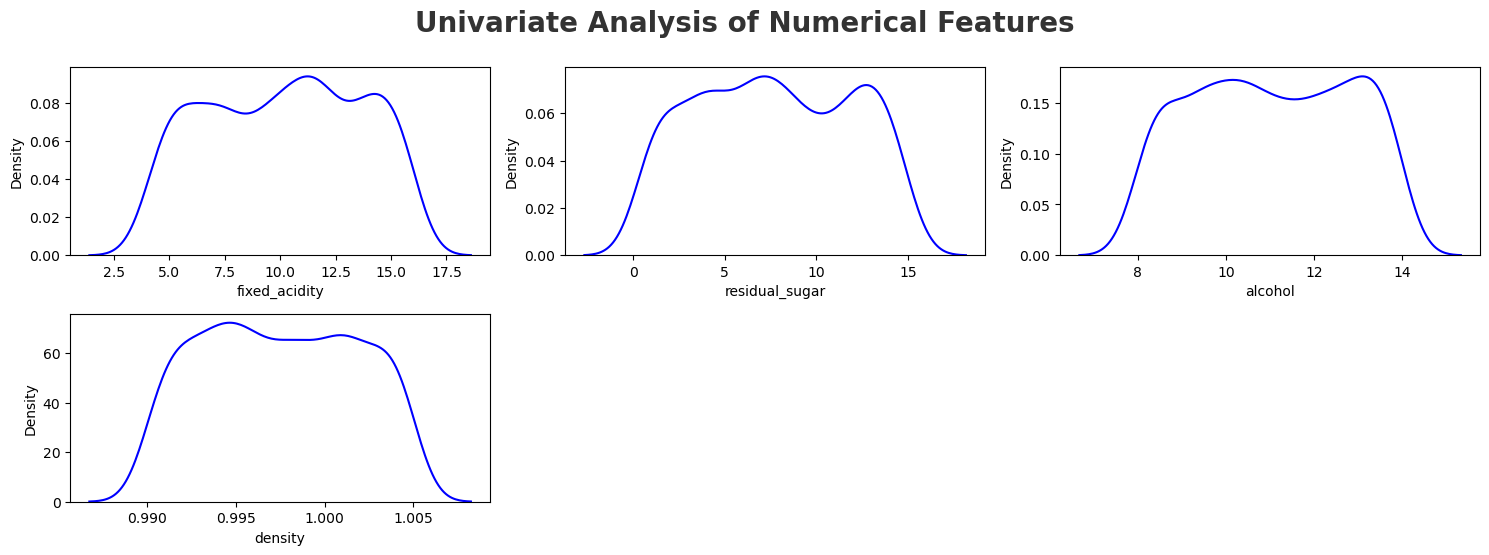

In [7]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Insights
- All the columns are normally distributed

#### 2. Categorical Features

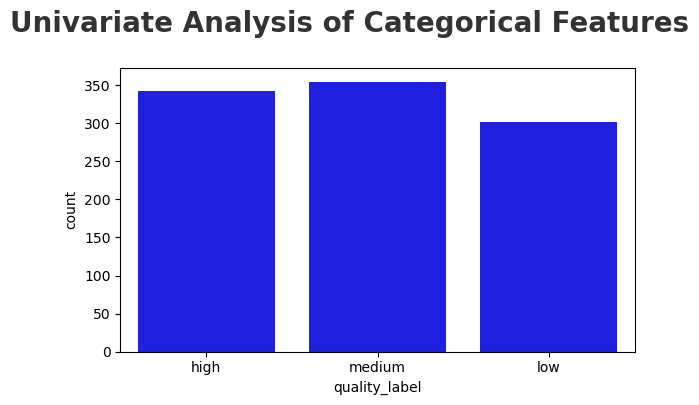

In [8]:
# categorical columns
plt.figure(figsize=(6, 4))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
sns.countplot(x=data['quality_label'], color='blue')
#plt.xlabel(categorical_features[i])
plt.tight_layout()

### Multivariate Analysis

#### 1. Correlation Analysis

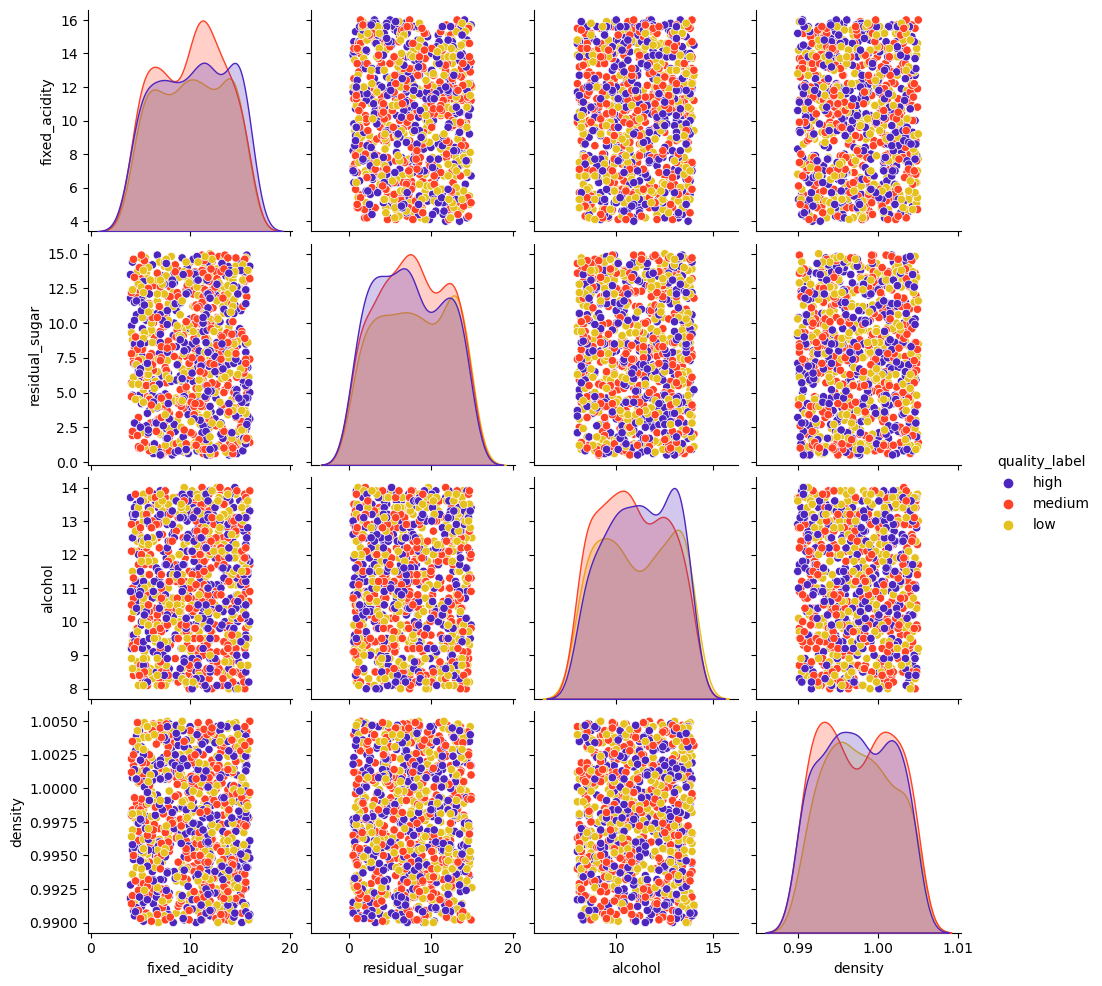

In [9]:
pairplot = sns.pairplot(data, hue="quality_label", palette="CMRmap")

### ML 

### 1. Split dataset 

In [10]:
X = data[['fixed_acidity', 'residual_sugar', 'alcohol', 'density']]
y = data['quality_label']

In [11]:
num_features = list(X.select_dtypes(exclude="object").columns)

# Label encode the target
le = LabelEncoder()
y= le.fit_transform(y)

In [12]:
# Standardization 
numeric_transformer = MinMaxScaler()


# Pipeline
preprocessor = ColumnTransformer(
    [
       ("MinmaxScaler", numeric_transformer, num_features)
    ]
)

X = preprocessor.fit_transform(X)
X = pd.DataFrame(X)

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 4), (200, 4))

In [ ]:




pipeline = Pipeline([
    ('logreg', LogisticRegression()) 
])


In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('logreg', LogisticRegression())])

In [17]:
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.385

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.46      0.43        71
           1       0.00      0.00      0.00        62
           2       0.38      0.66      0.48        67

    accuracy                           0.38       200
   macro avg       0.26      0.37      0.30       200
weighted avg       0.27      0.39      0.31       200



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, \
    AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb 
from sklearn.metrics import accuracy_score, \
    precision_score, recall_score, f1_score

In [25]:
classifiers = [    
    LogisticRegression(max_iter=500),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    GaussianNB(),
]

# dataframe to store the accuracy of each classifier
df_results = pd.DataFrame(columns=
    ['Classifier', 'Accuracy','Precision', 'Recall', 'F1_Score'])


for classifier in classifiers:
    pipe = Pipeline(steps=[
        ('classifier', classifier)])
    pipe.fit(X_train, y_train) 
    y_pred = pipe.predict(X_test)
        
    # append the result to the dataframe
    df_results = df_results.append(pd.Series({
        'Classifier' : classifier, 
        'Accuracy' : accuracy_score(y_pred, y_test),
        'Precision' : precision_score(y_pred, y_test, average='weighted'),
        'Recall':    recall_score(y_pred, y_test, average='weighted'),
        'F1_Score': f1_score(y_pred, y_test, average='weighted'),
    }),ignore_index = True)
df_results

,Classifier,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression(max_iter=500),0.385,0.573783,0.385,0.456764
1,KNeighborsClassifier(),0.355,0.405585,0.355,0.369316
2,SVC(),0.380,0.477684,0.380,0.409489
3,DecisionTreeClassifier(),0.275,0.273998,0.275,0.274460
4,GaussianNB(),0.365,0.491525,0.365,0.410541


In [24]:
classifiers_ensemble = [    
     RandomForestClassifier(n_estimators = 500),
     ExtraTreesClassifier(),
     AdaBoostClassifier(),
     GradientBoostingClassifier(),
     xgb.XGBClassifier() 
]

df_results1 = pd.DataFrame(columns=
    ['Classifier', 'Accuracy','Precision', 'Recall', 'F1_Score'])


for classifier in classifiers_ensemble:
    pipe = Pipeline(steps=[
        ('classifier', classifier)])
    pipe.fit(X_train, y_train) 
    y_pred = pipe.predict(X_test)
        
    # append the result to the dataframe
    df_results1 = df_results1.append(pd.Series({
        'Classifier' : classifier, 
        'Accuracy' : accuracy_score(y_pred, y_test),
        'Precision' : precision_score(y_pred, y_test, average='weighted'),
        'Recall':    recall_score(y_pred, y_test, average='weighted'),
        'F1_Score': f1_score(y_pred, y_test, average='weighted'),
    }),ignore_index = True)
    
df_results1

,Classifier,Accuracy,Precision,Recall,F1_Score
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.370,0.378308,0.370,0.372480
1,"(ExtraTreeClassifier(random_state=403608206), ...",0.340,0.354236,0.340,0.341489
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.350,0.365920,0.350,0.353444
3,([DecisionTreeRegressor(criterion='friedman_ms...,0.355,0.405502,0.355,0.370908
4,"XGBClassifier(base_score=None, booster=None, c...",0.340,0.357511,0.340,0.344310
